In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
# Get the html code of the url
url = 'https://justuseapp.com/en/app/1297605670/mymta/reviews'
response = requests.get(url)

In [4]:
# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

In [5]:

    # Identify HTML elements that contain review information based on itemprop.
    # Examine the DOM of the webpage
    # Use the developement tool's hover over elements
    # Find a unique tag for the data you want to extract, i.e class, id, itemprop, h4
    reviews = soup.find_all('div', itemprop='review')

In [6]:
    # Initialize lists to store data
    review_texts = []
    customer_names = []
    review_titles = []
    star_ratings = []
    counter = 0
    star_rating = 0
    

In [7]:
    # Extract information from each review
    for review in reviews:
        # Check if the customer name is NULL 
        # We do this to prevent the NAN error
        name_elem = review.find('span', itemprop='name')
        customer_name = name_elem.text if name_elem else "N/A"
        
        # Check if the review text is NULL
        review_text_elem = review.find('div', itemprop='reviewBody')
        review_text = review_text_elem.text if review_text_elem else "N/A"
        
        review_title_elem = review.find('h4')
        review_title = review_title_elem.text if review_title_elem else "N/A"
        
        # Find all spans with class 'fa fa-star' within the review div
        star_spans = review.find_all('span', class_='fa fa-star')
        
        # Check if the star spans have the specified style attribute
        for star_span in star_spans:
            style_attribute = star_span.get('style', '')
            
            
        print(style_attribute)
          

color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#dc3545;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#dc3545;font-size: 14px;
color:#dc3545;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#dc3545;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;
color:#f8f9fa;text-sh

In [8]:
    # Extract information from each review
    for review in reviews:
        # Check if the customer name is NULL 
        # We do this to prevent the NAN error
        name_elem = review.find('span', itemprop='name')
        customer_name = name_elem.text if name_elem else "N/A"
        
        # Check if the review text is NULL
        review_text_elem = review.find('div', itemprop='reviewBody')
        review_text = review_text_elem.text if review_text_elem else "N/A"
        
        review_title_elem = review.find('h4')
        review_title = review_title_elem.text if review_title_elem else "N/A"
        
        # Find all spans with class 'fa fa-star' within the review div
        star_spans = review.find_all('span', class_='fa fa-star')
        
        # Loop through all the stars
        for star_span in star_spans:
            style_attribute = star_span.get('style', '')
            # if the star is red, increment counter
            if style_attribute == 'color:#dc3545;font-size: 14px;':
                counter += 1
            #if the counter is 5 or the the star is grey assign star_rating to counter and reset counter
            if counter == 5 or style_attribute == 'color:#f8f9fa;text-shadow: 0 0 3px #000;font-size: 14px;':
                star_rating = counter
                counter = 0
                break
        
        #Append Values to the arrays
        customer_names.append(customer_name)
        review_texts.append(review_text)
        review_titles.append(review_title)
        star_ratings.append(star_rating)

           
        


In [9]:
    import pandas as pd

    justapp_reviews_df = pd.DataFrame({
        'Customer Name': customer_names,
        'Review Title': review_titles,
        'Review Text': review_texts,
        'Star Rating': star_ratings
    })
    
    justapp_reviews_df.head()

,Customer Name,Review Title,Review Text,Star Rating
0,alexlawrens,Not for NYers,This is really designed for tourists who have...,2
1,HeadShouldersNissanToes,Ghost Trains?!,"Firstly, MYmta is great, the time is accurate...",4
2,Coco161620,I want the old app back,MYmta is trying to be too much! The old app t...,2
3,JeffTNYC,Glitches,I rely on this application now to get around ...,2
4,HardRockHope,Several New Glitches,Recently an update resulted in icons not show...,2


In [10]:
    filepath = "/Users/keerthanaravikumar/Downloads/MYmta.csv"

In [11]:
    # Read the CSV file into a DataFrame
    appstore_reviews_df = pd.read_csv(filepath)

In [12]:
    appstore_reviews_df.head()

,1,Unnamed: 1,(Fast Eddie77),11/05/20,2,MTA APP REVIEW!!,"It’s a so-so App!! When combined with the MTA, e-tix App, you can buy a future planned trip, in advance!! But other than that it’s limited to just MTA transit service transportation!! And it doesn’t instantly provide that service according to your location unless you type what you want in. The TRANSIT APP is the best there is because it gives ALL FORMS of TRANSPORTATION (Including water ferries) in the Tri-State Area as well as wherever your location might be!!"
0,2,NaN,whz1995,16/07/20,4,Annoying animation,Remove the opening animation please. It is jus...
1,3,NaN,iidoggo,17/08/20,4,Pretty good!,"If you’re only using this for buses, it’s grea..."
2,4,NaN,ForbiddenFruit13,23/08/20,1,NOT all-in-one,Do not consider yourself an all-in-one app if ...
3,5,NaN,chinapoohbear,29/08/20,5,Life Saver,My biggest fear of the city is getting lost an...
4,6,NaN,SotifyLuver,23/11/20,2,Times are not always correct,WAY too often are the times 2-3 minutes late o...


In [13]:

headers = ['id','unnamed', 'Customer Name', 'Date', 'Star Rating', 'Review Title', 'Review Text']  # Replace with your actual column names
appstore_reviews_df.columns = headers

# Create a new row of NaN values as a placeholder for the moved data
new_row = pd.Series([float('nan')] * len(headers), index=headers)

# Add the new row at the beginning of the DataFrame
appstore_reviews_df = pd.concat([pd.DataFrame([new_row]), appstore_reviews_df], ignore_index=True)

# Reset index
appstore_reviews_df.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(appstore_reviews_df)

       id  unnamed     Customer Name      Date  Star Rating  \
0     NaN      NaN               NaN       NaN          NaN   
1     2.0      NaN           whz1995  16/07/20          4.0   
2     3.0      NaN           iidoggo  17/08/20          4.0   
3     4.0      NaN  ForbiddenFruit13  23/08/20          1.0   
4     5.0      NaN     chinapoohbear  29/08/20          5.0   
..    ...      ...               ...       ...          ...   
95   96.0      NaN             Lio#1  19/10/23          1.0   
96   97.0      NaN          lpshanet  01/11/23          1.0   
97   98.0      NaN         so_uncute  07/11/23          1.0   
98   99.0      NaN          italtrav  11/11/23          1.0   
99  100.0      NaN          Jimjima1  07/12/23          1.0   

                                         Review Title  \
0                                                 NaN   
1                                  Annoying animation   
2                                        Pretty good!   
3              

In [14]:
appstore_reviews_df.head()

,id,unnamed,Customer Name,Date,Star Rating,Review Title,Review Text
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NaN,whz1995,16/07/20,4.0,Annoying animation,Remove the opening animation please. It is jus...
2,3.0,NaN,iidoggo,17/08/20,4.0,Pretty good!,"If you’re only using this for buses, it’s grea..."
3,4.0,NaN,ForbiddenFruit13,23/08/20,1.0,NOT all-in-one,Do not consider yourself an all-in-one app if ...
4,5.0,NaN,chinapoohbear,29/08/20,5.0,Life Saver,My biggest fear of the city is getting lost an...


In [15]:
# Remove the first row (index 0)
appstore_reviews_df = appstore_reviews_df.iloc[1:, 2:]

# Reset index
appstore_reviews_df.reset_index(drop=True, inplace=True)

In [16]:
appstore_reviews_df.head()

,Customer Name,Date,Star Rating,Review Title,Review Text
0,whz1995,16/07/20,4.0,Annoying animation,Remove the opening animation please. It is jus...
1,iidoggo,17/08/20,4.0,Pretty good!,"If you’re only using this for buses, it’s grea..."
2,ForbiddenFruit13,23/08/20,1.0,NOT all-in-one,Do not consider yourself an all-in-one app if ...
3,chinapoohbear,29/08/20,5.0,Life Saver,My biggest fear of the city is getting lost an...
4,SotifyLuver,23/11/20,2.0,Times are not always correct,WAY too often are the times 2-3 minutes late o...


In [17]:
filepath1 = "/Users/keerthanaravikumar/Downloads/filter6590626789083_csv.csv"

In [18]:
google_reviews_df = pd.read_csv(filepath1)
google_reviews_df.head()

,Unnamed: 0,Unnamed: 1,Author,Date,Rating,Helpful count,Review,Picture included,Language,Language code,Reviewer Data,Profile Url,Review Url,Photos
0,1,NaN,Star Carrington-Payne,2023-02-28 13:30:14,5,0,Helps me to look for trains and busses ahead o...,no,en_US,NaN,NaN,NaN,NaN,NaN
1,2,NaN,RTYPE ZERO,2023-03-07 11:27:53,1,22,What's the point of having favorite stops and ...,no,en_US,NaN,NaN,NaN,NaN,NaN
2,3,NaN,Lydia Piazza,2023-03-07 12:28:48,4,0,Easy to use,no,en_US,NaN,NaN,NaN,NaN,NaN
3,4,NaN,Tanya Y.,2023-03-08 06:59:47,1,0,Horrible every time I put in to find the LIRR ...,no,en_US,NaN,NaN,NaN,NaN,NaN
4,5,NaN,Chris -The Beast- Merritt,2023-03-08 12:35:01,1,0,Not only that the New Buses can't be favorited...,no,en_US,NaN,NaN,NaN,NaN,NaN


In [19]:
# Specify the columns you want to remove
columns_to_keep = ['Author','Date','Rating','Review']

# Remo-ve the specified columns
google_reviews_df = google_reviews_df[columns_to_keep]
google_reviews_df.head()

,Author,Date,Rating,Review
0,Star Carrington-Payne,2023-02-28 13:30:14,5,Helps me to look for trains and busses ahead o...
1,RTYPE ZERO,2023-03-07 11:27:53,1,What's the point of having favorite stops and ...
2,Lydia Piazza,2023-03-07 12:28:48,4,Easy to use
3,Tanya Y.,2023-03-08 06:59:47,1,Horrible every time I put in to find the LIRR ...
4,Chris -The Beast- Merritt,2023-03-08 12:35:01,1,Not only that the New Buses can't be favorited...


In [20]:
google_reviews_df = google_reviews_df.rename(columns={'Author': 'Customer Name', 'Rating': 'Star Rating', 'Review': 'Review Text'})


In [21]:
reviews_df = pd.concat([justapp_reviews_df, appstore_reviews_df, google_reviews_df], ignore_index=True)


In [22]:
reviews_df.head()

,Customer Name,Review Title,Review Text,Star Rating,Date
0,alexlawrens,Not for NYers,This is really designed for tourists who have...,2.0,NaN
1,HeadShouldersNissanToes,Ghost Trains?!,"Firstly, MYmta is great, the time is accurate...",4.0,NaN
2,Coco161620,I want the old app back,MYmta is trying to be too much! The old app t...,2.0,NaN
3,JeffTNYC,Glitches,I rely on this application now to get around ...,2.0,NaN
4,HardRockHope,Several New Glitches,Recently an update resulted in icons not show...,2.0,NaN


In [23]:
# Remove duplicate rows based on all columns
reviews_df = reviews_df.drop_duplicates()

print(len(reviews_d

SyntaxError: incomplete input (2472572442.py, line 4)

In [24]:
!pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

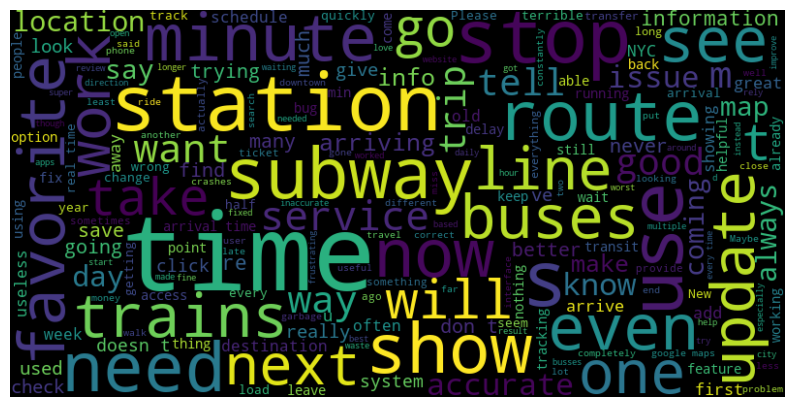

In [29]:
# Combine all review text into a single string
text_data = ' '.join(reviews_df['Review Text'].astype(str))

# Define a set of stop words
stopwords = set(STOPWORDS)

# Add additional stop words if needed
stopwords.update(["train", "bus", "app","MYmta","MTA"])

# Create a WordCloud object with stopwords
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, stopwords=stopwords).generate(text_data)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()